In [13]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy import stats

In [14]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)


df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df["target"] = housing.target

df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
df = df.reset_index(drop=True)
X = df[housing.feature_names]
targets = df["target"]
# Always use transform_data function on X
scaler = StandardScaler().fit(np.array(targets).reshape(-1, 1))
targets = scaler.transform(np.array(targets).reshape(-1, 1)).flatten()

df["target"] = targets
data=df

In [15]:
import sys
sys.path.append('..')

In [16]:
from xDL.models.NAM import NAM

In [17]:

nam = NAM(
    "target ~  -1  + MLP(MedInc) + MLP(AveRooms; encoding=one_hot; n_bins=10; hidden_dims=[12, 12, 12]) + MLP(AveOccup) + MLP(AveBedrms) + MLP(Population) + MLP(Latitude):MLP(Longitude)", 
    data=data, 
    feature_dropout=0.0001
    )

--- Preprocessing ---


0it [00:00, ?it/s]

8it [00:06,  1.20it/s]
7it [00:00, 329.21it/s]


In [18]:
import tensorflow as tf
def dummy_loss(y_true, y_pred):
    return tf.constant(0.0)

def dummy_metric(y_true, y_pred):
    return tf.constant(0.0)

In [19]:
#nam.compile(
#    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#    loss={**{"output": "mse"}, **{f"feature_pred_{i}": dummy_loss for i in range(len(nam.feature_nets))}},
#    metrics={**{"output": "mse"}, **{f"feature_pred_{i}": dummy_loss for i in range(len(nam.feature_nets))}}
#)

nam.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss={"output":"mse"},
    metrics={"output":"mae"},
)

# Train the model
nam.fit(nam.training_dataset, epochs=100, validation_data=nam.validation_dataset)

# Evaluate the model
loss = nam.evaluate(nam.validation_dataset)
print("Test Loss:", loss)

Epoch 1/100


------------- Network architecture --------------
MedInc -> MLP(feature=MedInc, n_params=12736) -> output dimension=1
AveRooms -> MLP(feature=AveRooms, n_params=456) -> output dimension=1
AveOccup -> MLP(feature=AveOccup, n_params=12736) -> output dimension=1
AveBedrms -> MLP(feature=AveBedrms, n_params=12736) -> output dimension=1
Population -> MLP(feature=Population, n_params=12736) -> output dimension=1
Latitude_._Longitude -> MLP(feature=Latitude_._Longitude, n_params=12864) -> output dimension=1
16/16 [==============================] - 8s 70ms/step - loss: 0.9462 - output_loss: 0.9462 - output_mae: 0.7475 - val_loss: 0.4504 - val_output_loss: 0.4504 - val_output_mae: 0.5007
Epoch 2/100
16/16 [==============================] - 1s 40ms/step - loss: 0.6731 - output_loss: 0.6731 - output_mae: 0.6252 - val_loss: 0.4581 - val_output_loss: 0.4581 - val_output_mae: 0.5145
Epoch 3/100
16/16 [==============================] - 1s 39ms/step - loss: 0.5689 - output_loss: 0.5689 - output_mae: 0

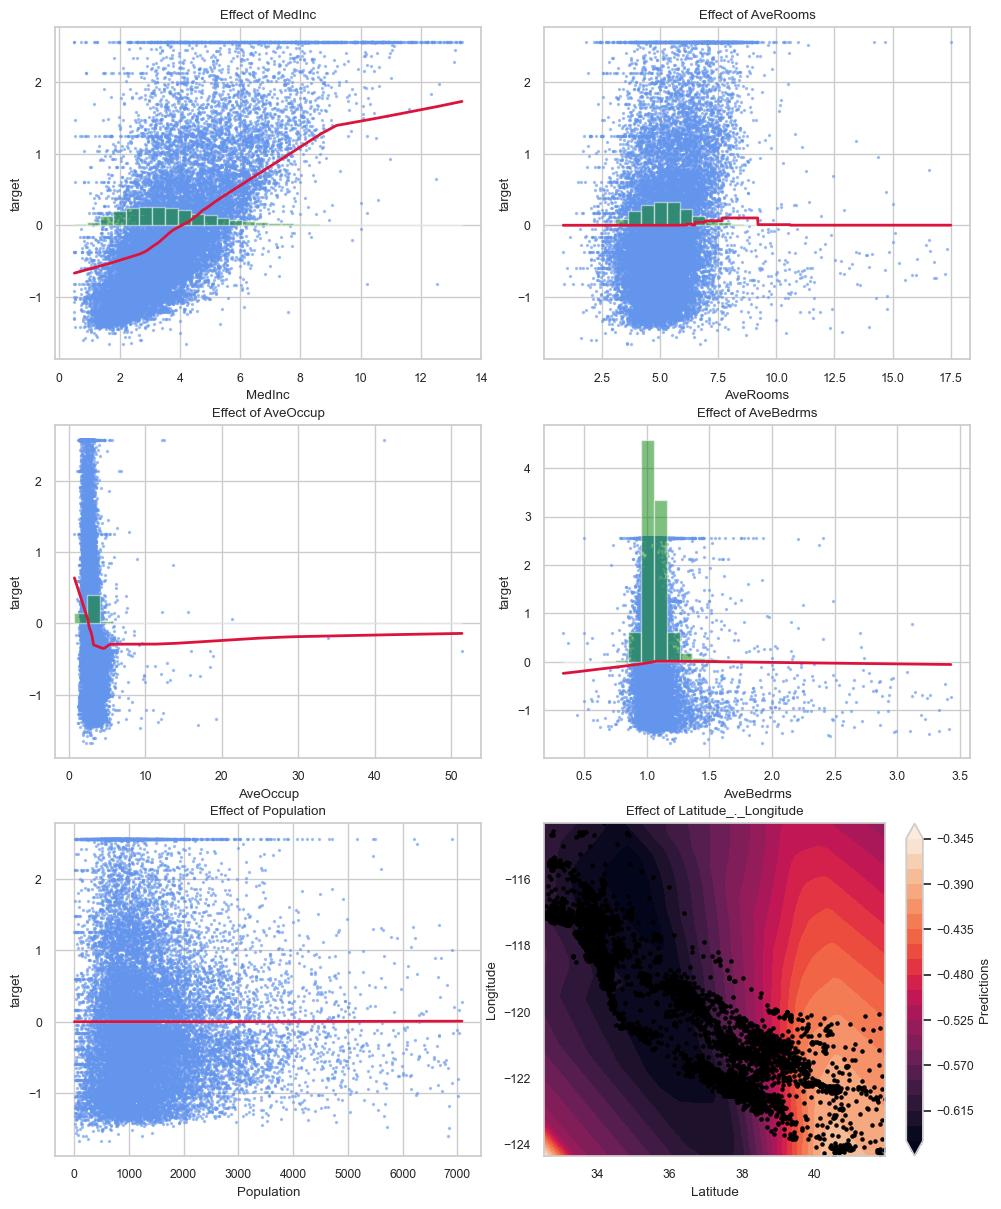

In [20]:
nam.plot()

In [21]:
nam.plot_single_effects(port=8053)

In [22]:
nam.plot_all_effects(port=8053)

--- Preprocessing ---


0it [00:00, ?it/s]

8it [00:08,  1.12s/it]


40/40 [==============================] - 1s 6ms/step


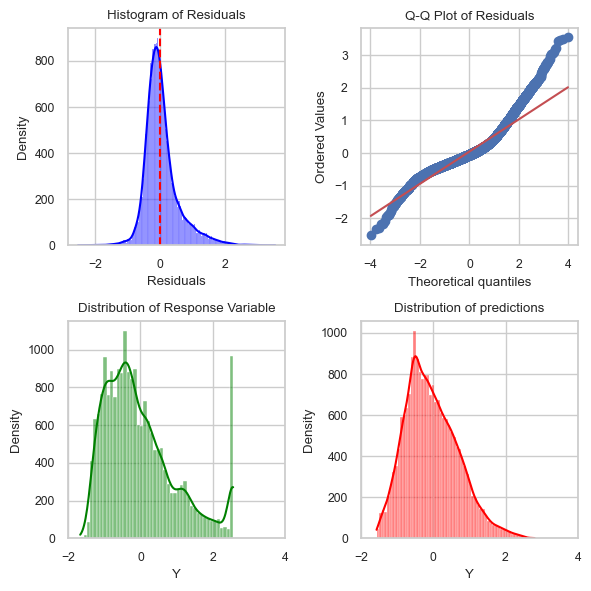

In [23]:
nam.plot_analysis()

In [25]:
significances = nam.get_significance()
significances

16/16 [==============================] - 0s 7ms/step


,feature,t-stat,p_value
0,MedInc,[-6.641],[0.0002]
1,AveRooms,[1.2323],[0.2088]
2,AveOccup,[-9.9145],[0.0002]
3,AveBedrms,[-1.0284],[0.3003]
4,Population,[0.0113],[0.9898]
5,Latitude_._Longitude,[11.8231],[0.0002]
